# Cancer Prediction

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Cancer.xlsx')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Checking the Null Values

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Dropped the ID column from dataset

In [7]:
df = df.drop('id',axis= 1)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Encoding the Diagnosis column with 0 & 1

In [10]:
df = df.replace({'diagnosis':{'M': 1,'B': 0}})

In [11]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
len(df)

569

## Visualizing the data to find the insights from dataset 

<Axes: xlabel='diagnosis', ylabel='Count'>

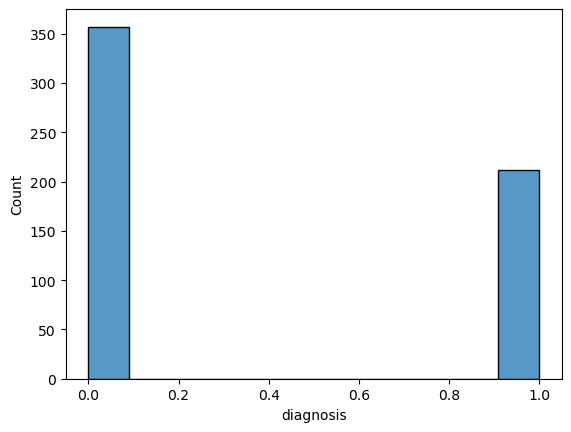

In [15]:
sns.histplot(data=df, x="diagnosis")

In [31]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
Features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [39]:
enum_fea = list(enumerate(Features))

In [40]:
enum_fea

[(0, 'radius_mean'),
 (1, 'texture_mean'),
 (2, 'perimeter_mean'),
 (3, 'area_mean'),
 (4, 'smoothness_mean'),
 (5, 'compactness_mean'),
 (6, 'concavity_mean'),
 (7, 'concave points_mean'),
 (8, 'symmetry_mean'),
 (9, 'fractal_dimension_mean')]

In [45]:
for i in enum_fea:
   print(i[0])

0
1
2
3
4
5
6
7
8
9


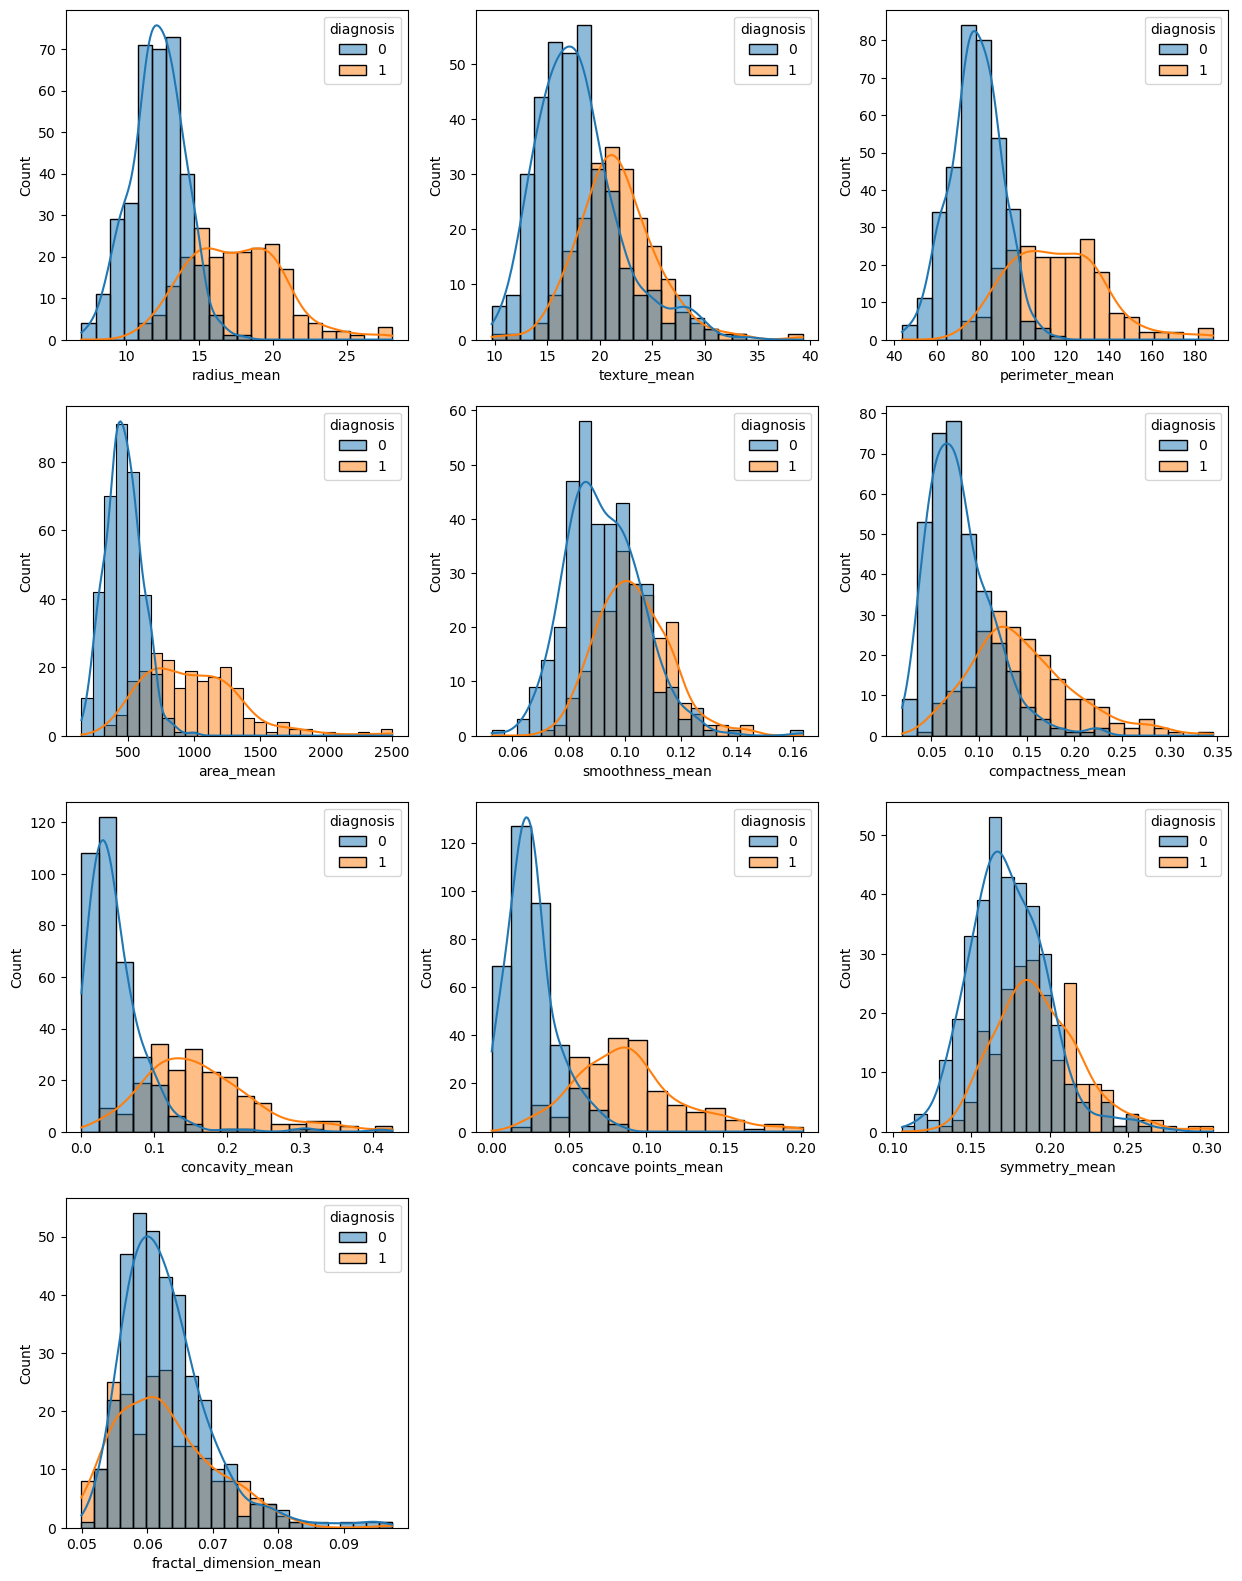

In [62]:
plt.figure(figsize=(15,30))
for i in enum_fea:
    plt.subplot(6,3,i[0]+1)
    sns.histplot(x = i[1], hue ="diagnosis", kde=True,data = df)
    

In [ ]:
sns.boxplot(x=df['BMI'])

In [65]:
Features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [67]:
Features = list(enumerate(Features))

In [68]:
Features

[(0, 'radius_mean'),
 (1, 'texture_mean'),
 (2, 'perimeter_mean'),
 (3, 'area_mean'),
 (4, 'smoothness_mean'),
 (5, 'compactness_mean'),
 (6, 'concavity_mean'),
 (7, 'concave points_mean'),
 (8, 'symmetry_mean'),
 (9, 'fractal_dimension_mean'),
 (10, 'radius_se'),
 (11, 'texture_se'),
 (12, 'perimeter_se'),
 (13, 'area_se'),
 (14, 'smoothness_se'),
 (15, 'compactness_se'),
 (16, 'concavity_se'),
 (17, 'concave points_se'),
 (18, 'symmetry_se'),
 (19, 'fractal_dimension_se'),
 (20, 'radius_worst'),
 (21, 'texture_worst'),
 (22, 'perimeter_worst'),
 (23, 'area_worst'),
 (24, 'smoothness_worst'),
 (25, 'compactness_worst'),
 (26, 'concavity_worst'),
 (27, 'concave points_worst'),
 (28, 'symmetry_worst'),
 (29, 'fractal_dimension_worst')]

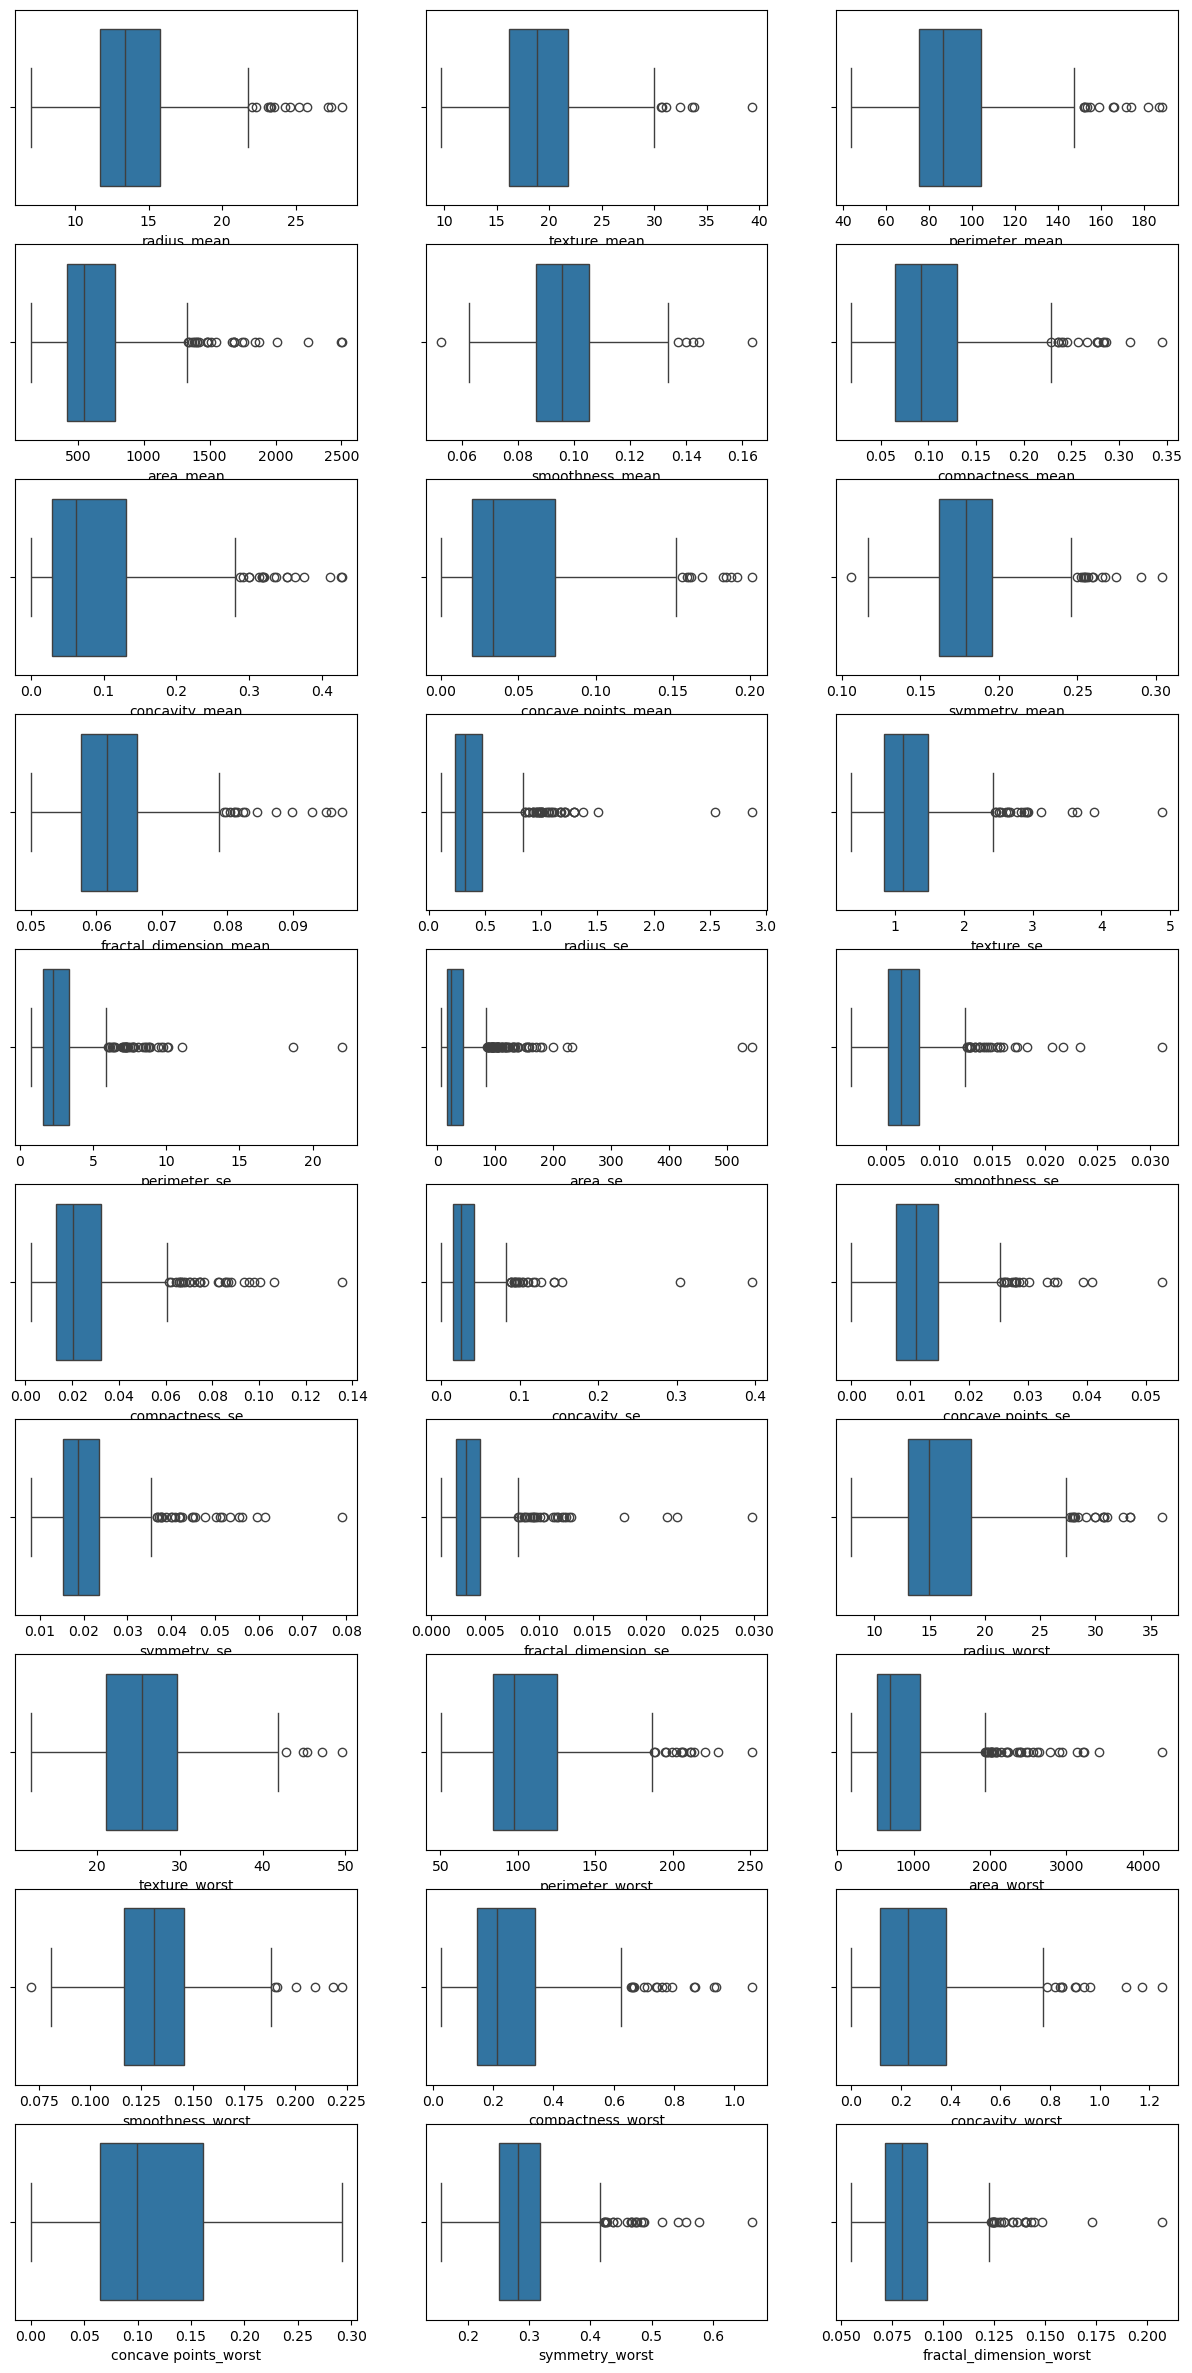

In [73]:
plt.figure(figsize=(15,30))
for i in Features:
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [74]:
mn_Q1 = np.percentile(df['area_se'],25)

mn_Q3 = np.percentile(df['area_se'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

27.339999999999996
-23.15999999999999
86.19999999999999


In [75]:
df = df[(df['area_se'] > mn_lower_range) & (df['area_se'] < mn_upper_range)]
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,0.291667,13.353649,18.952540,86.551567,573.128968,0.095406,0.096264,0.074084,0.040567,0.179046,...,15.125454,25.288512,99.230933,738.528968,0.131528,0.238851,0.247417,0.103193,0.287921,0.083620
std,0.454981,2.782476,4.231357,18.955858,251.250049,0.014086,0.046089,0.066101,0.030550,0.026112,...,3.604928,6.081082,24.748260,371.596034,0.023301,0.151287,0.199524,0.058920,0.060929,0.018261
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.000000,11.517500,15.852500,73.877500,405.950000,0.085038,0.061545,0.026780,0.019110,0.161200,...,12.777500,20.735000,82.727500,494.500000,0.114400,0.136325,0.104675,0.061360,0.247950,0.070830
50%,0.000000,12.945000,18.530000,83.350000,514.400000,0.094755,0.084985,0.052225,0.029535,0.177700,...,14.385000,24.945000,93.905000,630.050000,0.130200,0.198950,0.192350,0.090835,0.279750,0.079505
75%,1.000000,14.745000,21.487500,96.145000,668.625000,0.104025,0.120600,0.103150,0.058202,0.194050,...,16.782500,29.170000,112.650000,861.625000,0.145025,0.304825,0.343825,0.142425,0.315350,0.091360
max,1.000000,23.290000,39.280000,158.900000,1685.000000,0.163400,0.283900,0.410800,0.162000,0.274300,...,26.680000,49.540000,177.000000,2089.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


<Axes: xlabel='area_se'>

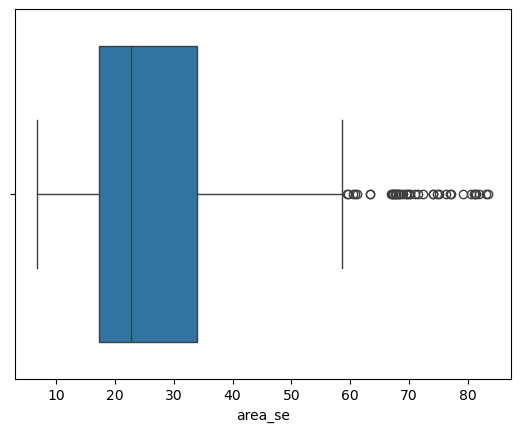

In [76]:
sns.boxplot(x=df['area_se'])

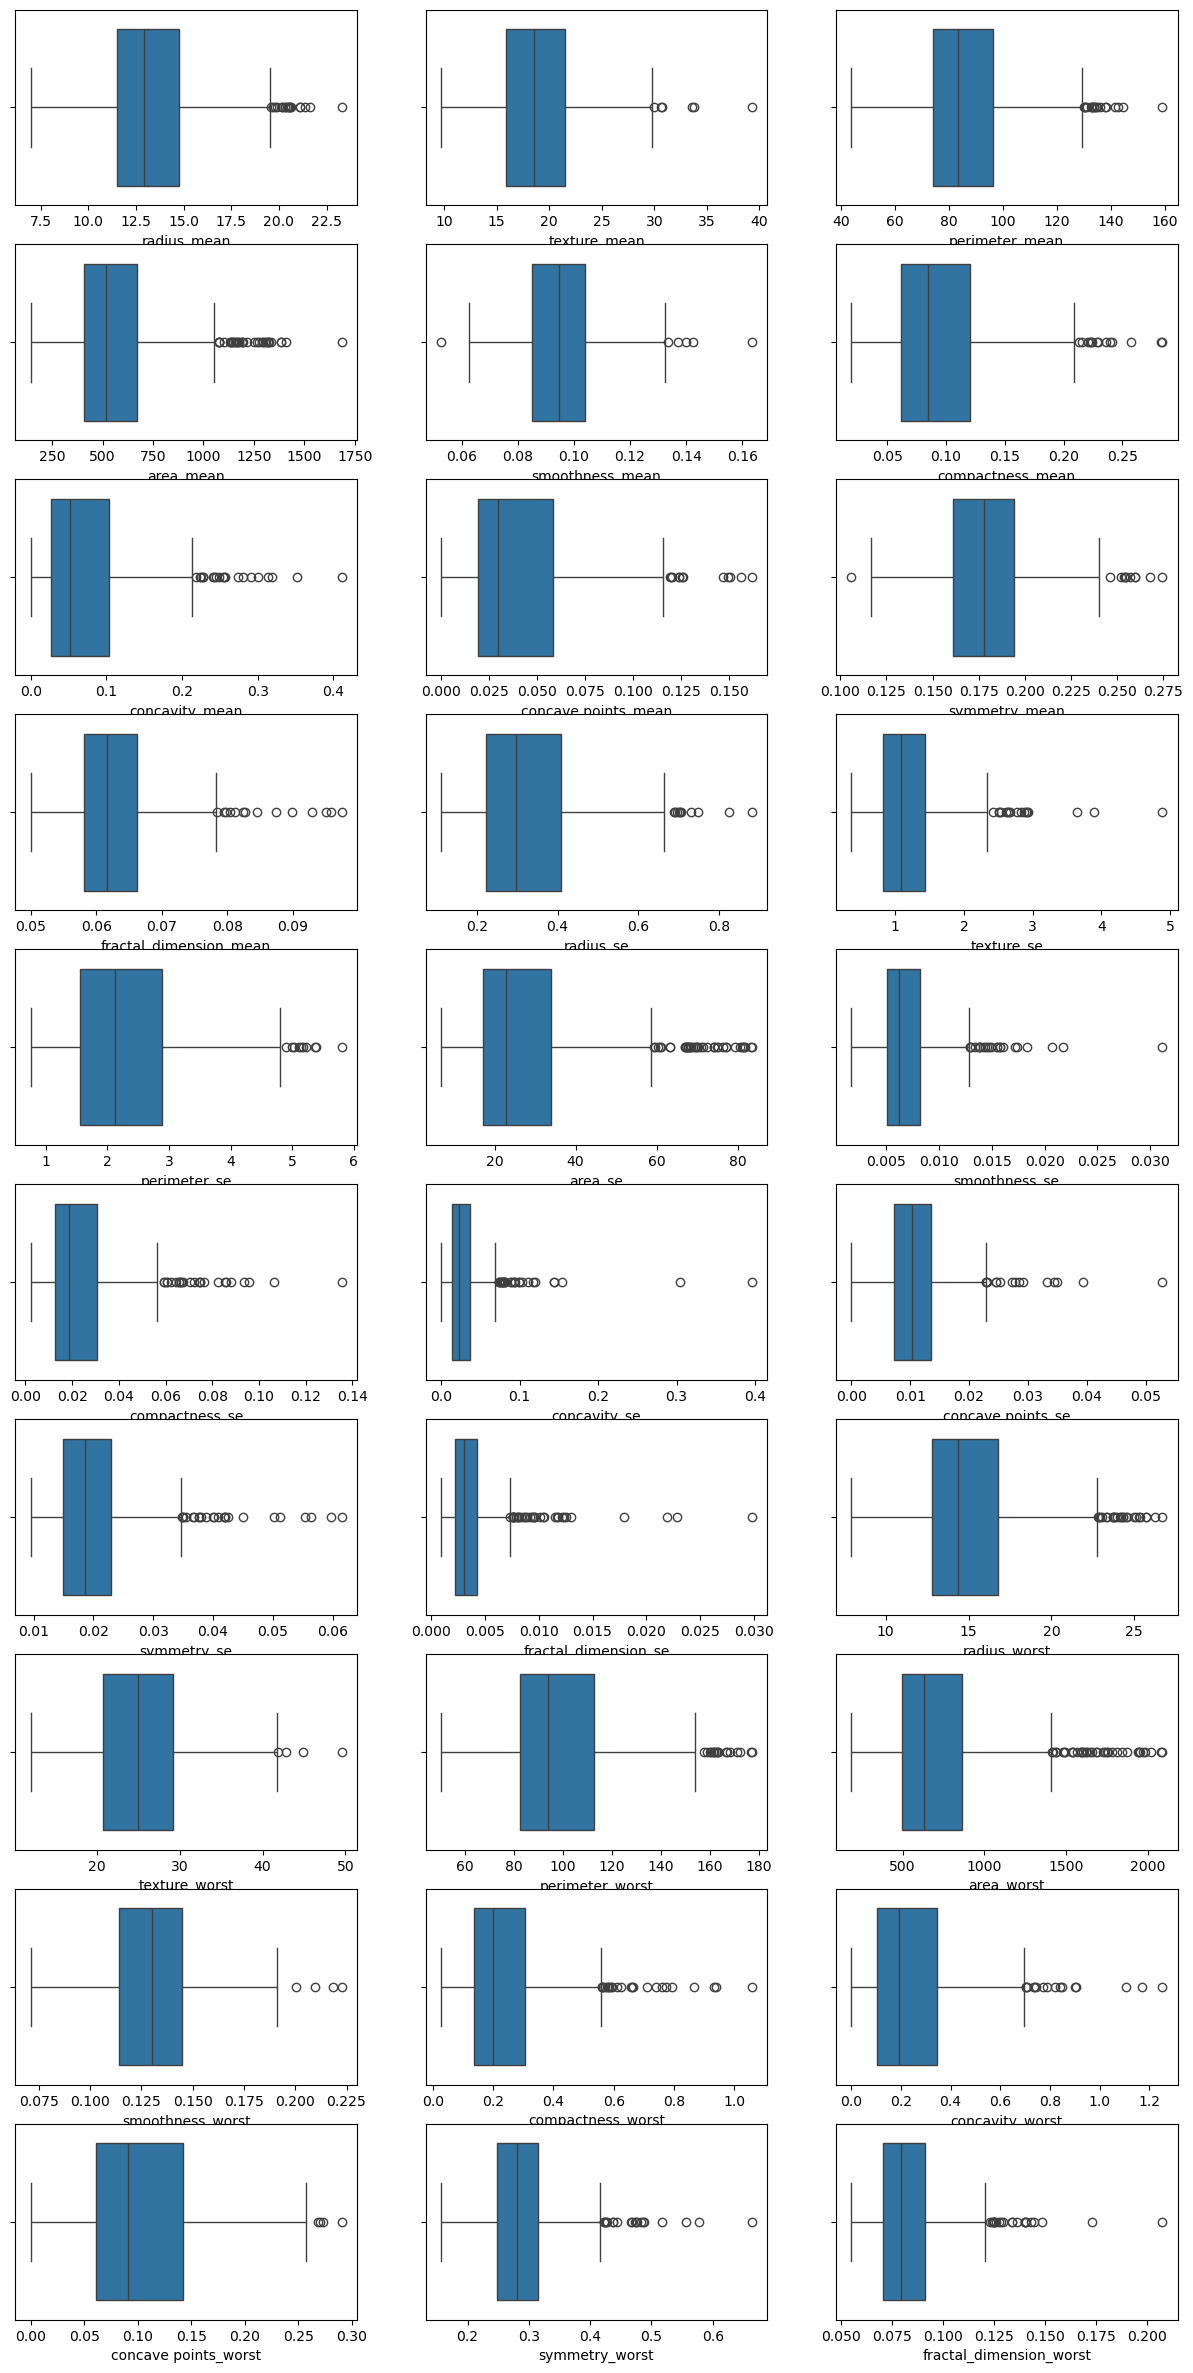

In [77]:
plt.figure(figsize=(15,30))
for i in Features:
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [78]:
mn_Q1 = np.percentile(df['area_worst'],25)

mn_Q3 = np.percentile(df['area_worst'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

367.125
-56.1875
1412.3125


In [79]:
df = df[(df['area_worst'] > mn_lower_range) & (df['area_worst'] < mn_upper_range)]
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,0.235546,12.853981,18.721049,83.154368,523.416916,0.095060,0.093136,0.066640,0.036158,0.178367,...,14.453638,24.958694,94.712612,662.283940,0.130658,0.229954,0.229987,0.096146,0.285585,0.083437
std,0.424795,2.196674,4.209583,14.960651,180.707869,0.014328,0.044949,0.060697,0.026183,0.026214,...,2.777073,6.063177,19.353593,258.208602,0.023537,0.148176,0.193157,0.054333,0.060135,0.018450
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.000000,11.415000,15.700000,73.360000,399.800000,0.084680,0.059925,0.025555,0.018480,0.160100,...,12.575000,20.440000,81.785000,477.550000,0.113950,0.131050,0.094160,0.058860,0.246800,0.070615
50%,0.000000,12.770000,18.240000,82.500000,504.100000,0.094270,0.081650,0.046860,0.028470,0.176100,...,14.110000,24.490000,91.760000,607.300000,0.129600,0.189200,0.180400,0.084760,0.277800,0.079180
75%,0.000000,14.260000,21.095000,93.235000,632.800000,0.103950,0.115400,0.092835,0.052175,0.193650,...,16.225000,28.695000,107.050000,807.550000,0.142850,0.288350,0.315650,0.128600,0.311300,0.091300
max,1.000000,19.550000,39.280000,129.100000,1174.000000,0.163400,0.283900,0.410800,0.146900,0.274300,...,22.510000,49.540000,149.600000,1410.000000,0.222600,1.058000,1.252000,0.270100,0.663800,0.207500


<Axes: xlabel='area_worst'>

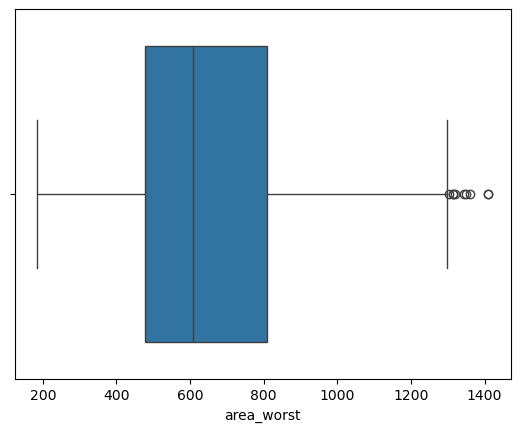

In [80]:
sns.boxplot(x=df['area_worst'])

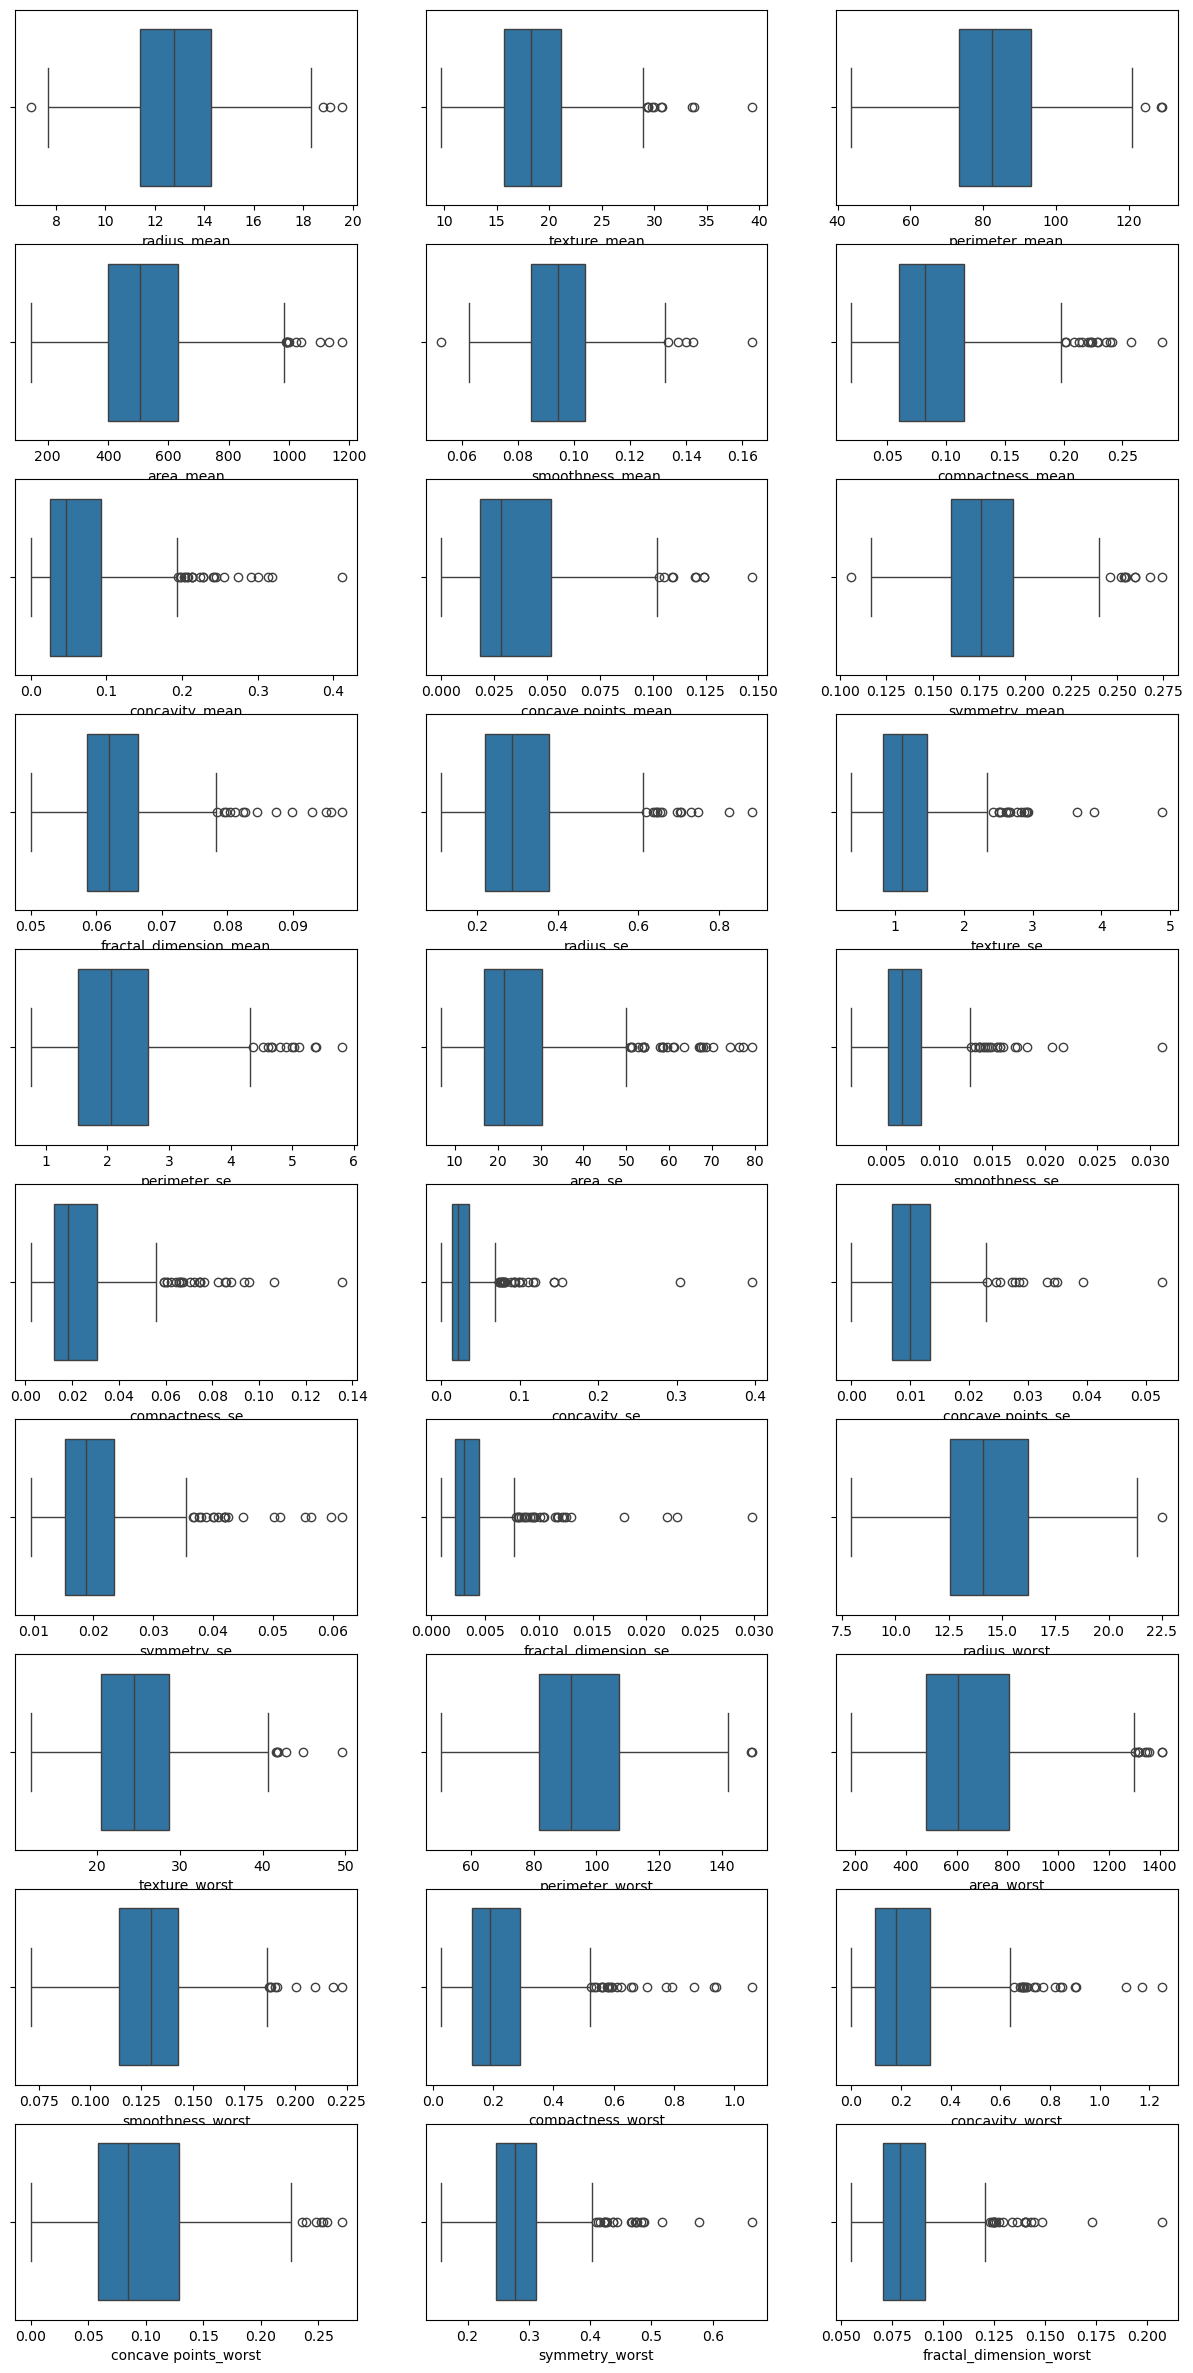

In [81]:
plt.figure(figsize=(15,30))
for i in Features:
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [86]:
df.shape

(440, 31)

In [83]:
mn_Q1 = np.percentile(df['fractal_dimension_se'],25)

mn_Q3 = np.percentile(df['fractal_dimension_se'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

0.0022380000000000004
-0.0012020000000000008
0.007750000000000001


In [84]:
df = df[(df['fractal_dimension_se'] > mn_lower_range) & (df['fractal_dimension_se'] < mn_upper_range)]
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.234091,12.900368,18.704114,83.338455,526.689773,0.094505,0.088608,0.060571,0.034826,0.177171,...,14.517532,24.967864,94.977523,667.944773,0.130134,0.218151,0.214351,0.093882,0.28415,0.081235
std,0.423911,2.157747,4.250911,14.723237,177.617595,0.013616,0.040345,0.052994,0.025267,0.025191,...,2.760917,6.066915,19.240830,257.568963,0.022752,0.133422,0.173358,0.053603,0.05633,0.015203
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.15660,0.055210
25%,0.000000,11.485000,15.700000,73.690000,403.250000,0.084572,0.059122,0.023950,0.017778,0.159750,...,12.680000,20.415000,82.125000,489.500000,0.113900,0.125100,0.089675,0.057807,0.24725,0.070340
50%,0.000000,12.830000,18.220000,82.550000,507.150000,0.093760,0.078725,0.043750,0.027670,0.174250,...,14.165000,24.550000,91.820000,613.000000,0.129500,0.184100,0.175450,0.083225,0.27710,0.078150
75%,0.000000,14.275000,21.190000,92.727500,634.850000,0.103600,0.111775,0.082918,0.049412,0.192825,...,16.302500,28.827500,107.325000,808.975000,0.142700,0.268825,0.299625,0.125100,0.31090,0.088337
max,1.000000,19.550000,39.280000,128.900000,1174.000000,0.139800,0.257600,0.318900,0.124200,0.274300,...,22.510000,49.540000,149.600000,1410.000000,0.222600,0.937900,1.170000,0.270100,0.57740,0.140900


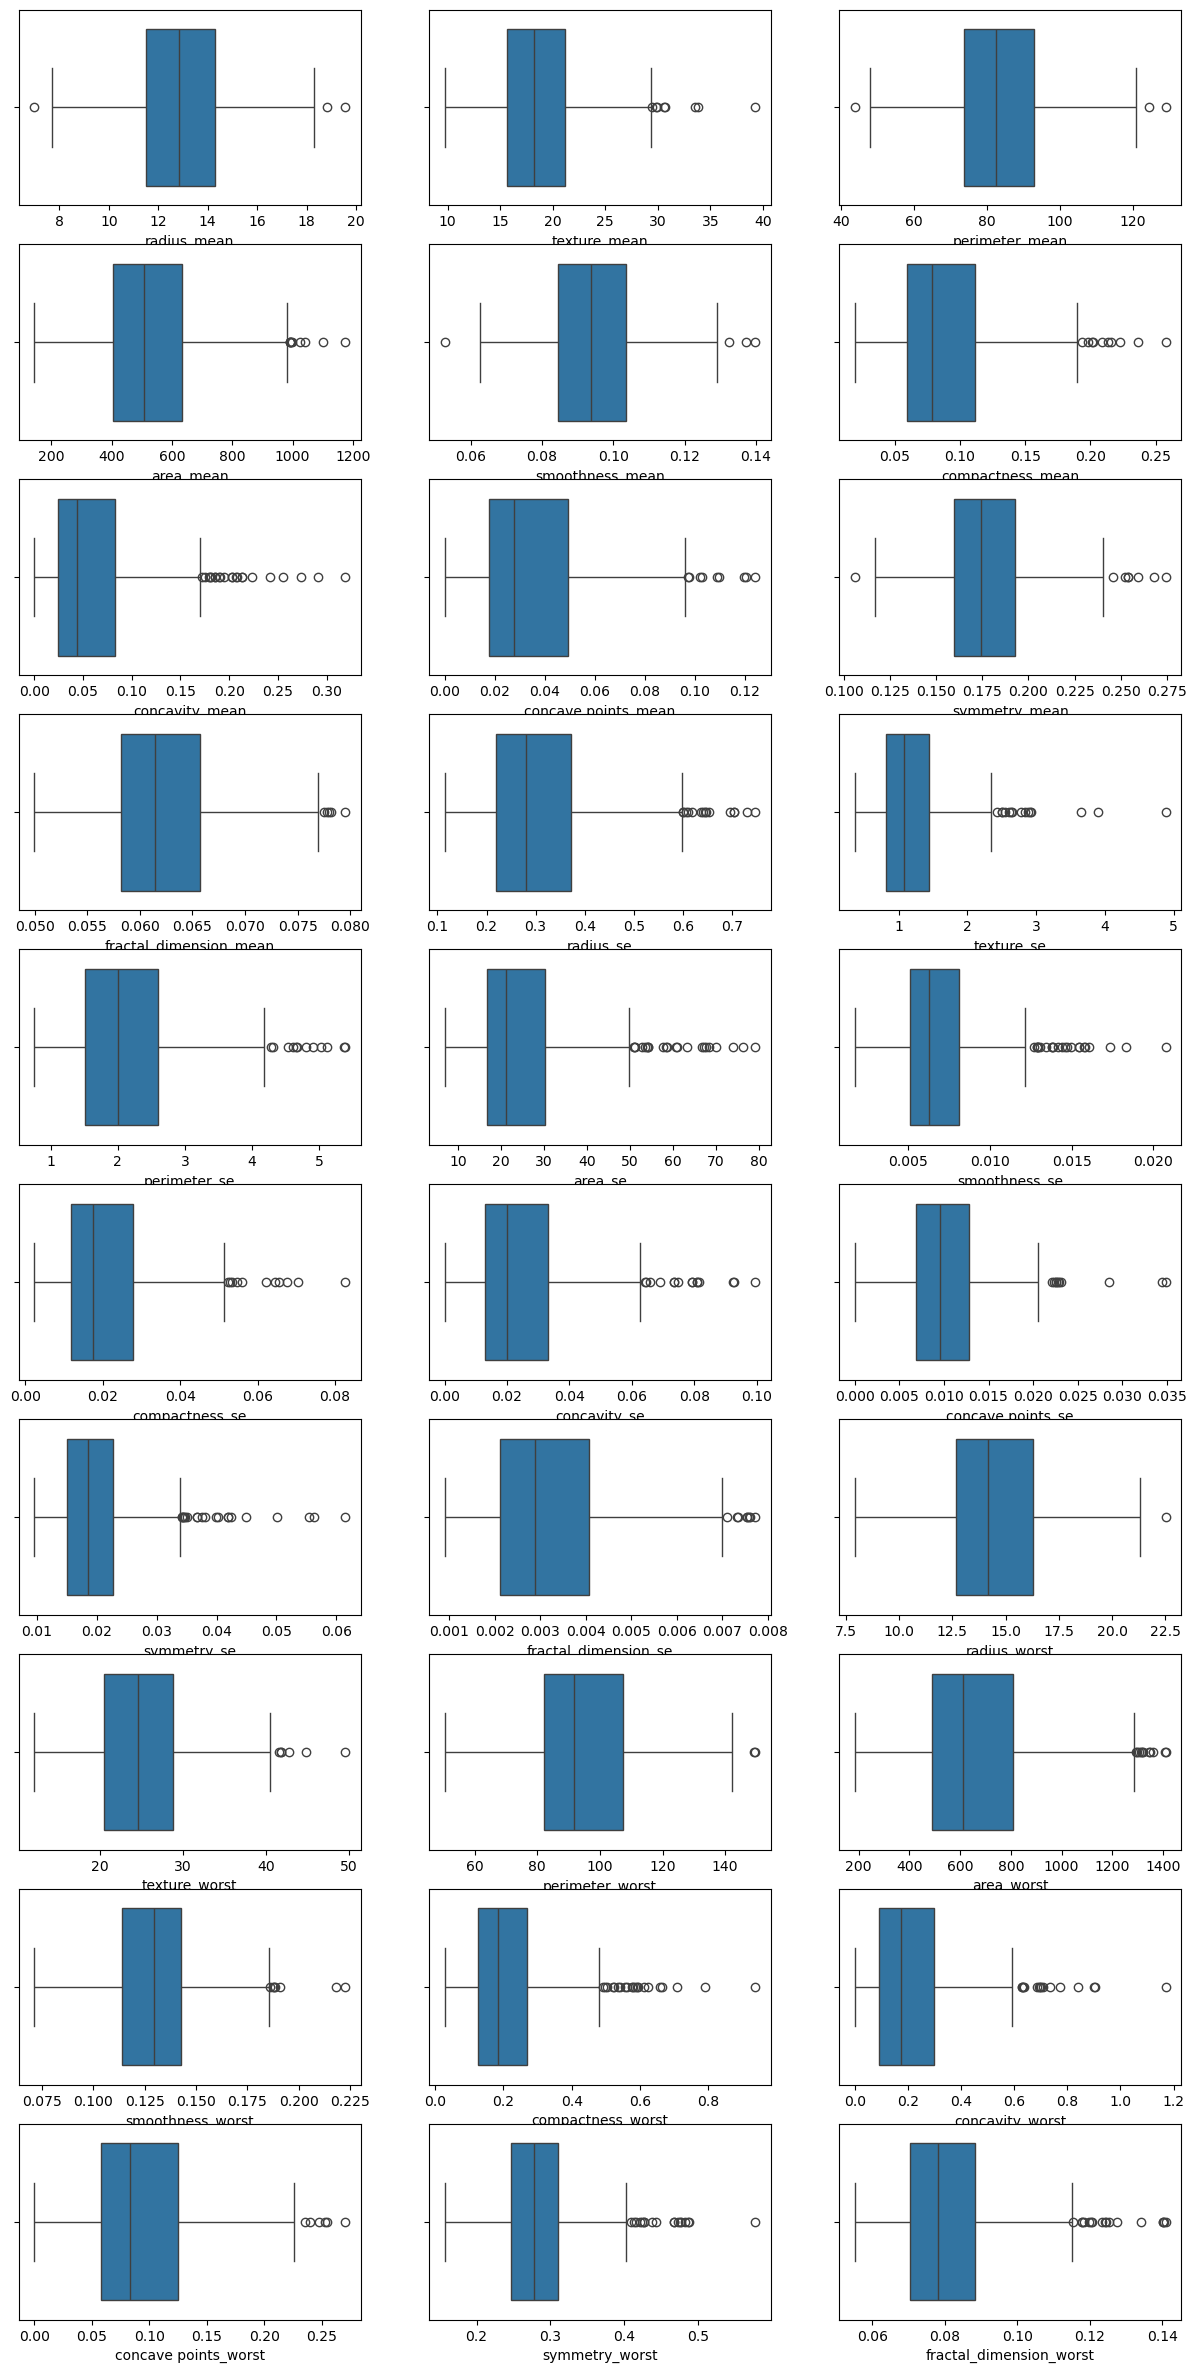

In [85]:
plt.figure(figsize=(15,30))
for i in Features:
    plt.subplot(10,3,i[0]+1)
    sns.boxplot(x=df[i[1]])

<Axes: >

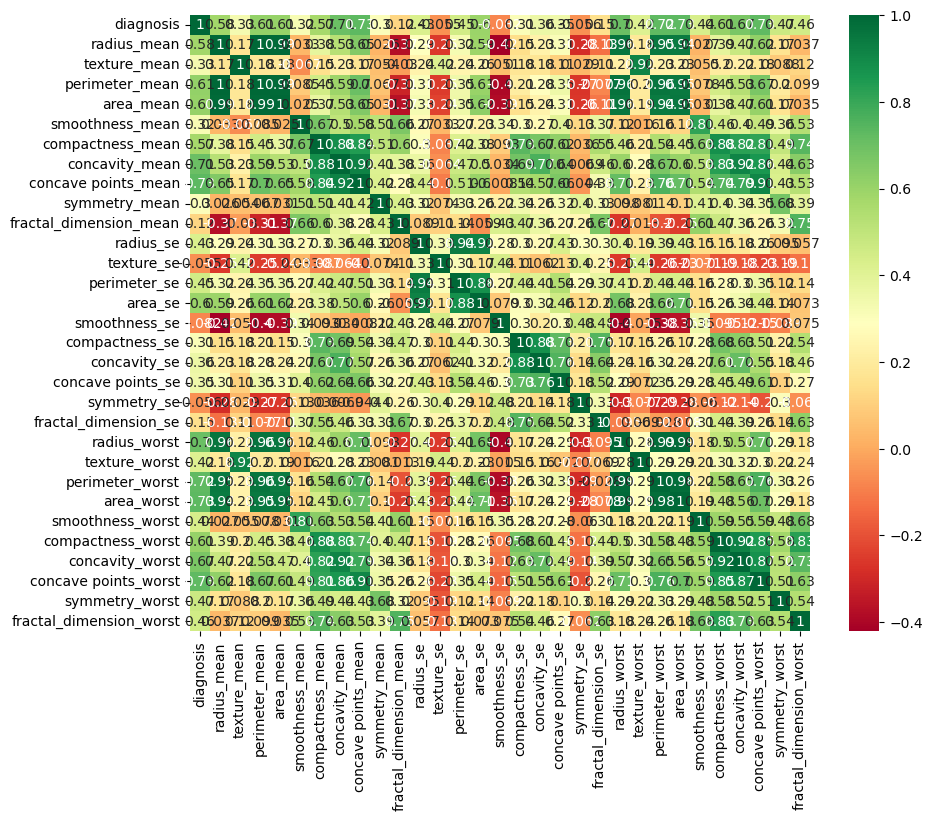

In [87]:
plt.figure(figsize=(10,8)) 
# seaborn has an easy method to showcase heatmap 
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [88]:
X = df.drop('diagnosis',axis= 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480


In [89]:
y = df['diagnosis']
y

5      1
7      1
8      1
10     1
11     1
      ..
560    0
561    0
562    1
566    1
568    0
Name: diagnosis, Length: 440, dtype: int64

In [90]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                        columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])


In [91]:
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.208959,-0.707503,-0.052253,-0.279512,2.448050,2.019703,1.836807,1.825200,1.253035,2.457672,...,0.345375,-0.200967,0.438238,0.286289,2.154581,2.301703,1.854624,1.498209,2.032304,2.842482
1,0.375648,0.500671,0.466566,0.288646,1.793669,1.883224,0.625106,0.991532,1.686225,2.170452,...,0.921927,0.523453,0.812868,0.890309,1.551757,1.125899,0.308665,1.152688,0.630046,2.230065
2,0.046227,0.733827,0.282973,-0.038834,2.411287,2.595398,2.367658,2.326035,2.298254,2.060528,...,0.352628,0.950845,0.583928,0.277349,1.767365,2.415756,1.874836,2.094000,2.730767,1.709840
3,1.447428,1.068253,1.316530,1.528108,-0.915027,-0.543876,-0.521042,-0.063231,-0.968553,-0.939329,...,1.694288,1.470645,1.499690,1.873688,-0.529529,-0.473105,-0.395304,0.109587,0.189286,0.216333
4,1.336074,-0.191733,1.377728,1.433415,0.190803,1.007274,0.736188,1.237591,0.279351,-0.256737,...,2.140299,0.381540,2.160496,2.452833,0.416510,2.571830,1.051903,1.627079,1.689293,1.551797


In [92]:
 X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2)

In [93]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [95]:
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select= 15)
rfe.fit(X_scaled,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)

In [96]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} select = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

radius_mean select = False rank = 16
texture_mean select = False rank = 14
perimeter_mean select = False rank = 13
area_mean select = False rank = 12
smoothness_mean select = False rank = 10
compactness_mean select = True rank = 1
concavity_mean select = False rank = 4
concave points_mean select = True rank = 1
symmetry_mean select = True rank = 1
fractal_dimension_mean select = True rank = 1
radius_se select = True rank = 1
texture_se select = True rank = 1
perimeter_se select = False rank = 2
area_se select = True rank = 1
smoothness_se select = False rank = 6
compactness_se select = False rank = 15
concavity_se select = False rank = 8
concave points_se select = False rank = 11
symmetry_se select = False rank = 9
fractal_dimension_se select = False rank = 7
radius_worst select = False rank = 3
texture_worst select = True rank = 1
perimeter_worst select = True rank = 1
area_worst select = True rank = 1
smoothness_worst select = True rank = 1
compactness_worst select = True rank = 1
co

In [97]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.9886363636363636


In [98]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test,dtc_pred)
print(" Decision Tree Accuracy : ",dtc_accuracy)

 Decision Tree Accuracy :  0.9545454545454546


In [99]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test,nb_pred)
print("Naive Bayes Accuracy : ",nb_accuracy)

Naive Bayes Accuracy :  0.9659090909090909


In [100]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test,KNN_pred)
print("K Nearest Neighbours Accuracy : ",KNN_accuracy)

K Nearest Neighbours Accuracy :  0.9886363636363636


In [101]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Support Vector Classifier : ",svc_accuracy)

Support Vector Classifier :  1.0


In [102]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
print("Logistic Regression Accuracy",lr_accuracy)

Logistic Regression Accuracy 0.9886363636363636


## K fold Cross Validation

In [103]:
dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc,X_scaled,y,cv=5)
print('Decision Tree accuracy:',dtc_score.mean())

rfc = RandomForestClassifier()
rfc_score = cross_val_score(rfc,X_scaled,y,cv=5)
print('Randiom forest accuracy:',rfc_score.mean())

nb = GaussianNB()
nb_score = cross_val_score(nb,X_scaled,y,cv=5)
print('Naive Bayesaccuracy:',nb_score.mean())

knn = KNeighborsClassifier()
knn_score = cross_val_score(knn,X_scaled,y,cv=5)
print('KNN accuracy:',knn_score.mean())

svc = SVC()
svc_score = cross_val_score(svc,X_scaled,y,cv=5)
print('SVC accuracy:',svc_score.mean())

lr = LogisticRegression()
lr_score = cross_val_score(lr,X_scaled,y,cv=5)
print('Logistic Regression accuracy:',lr_score.mean())

Decision Tree accuracy: 0.9
Randiom forest accuracy: 0.9568181818181818
Naive Bayesaccuracy: 0.9363636363636363
KNN accuracy: 0.9636363636363636
SVC accuracy: 0.965909090909091
Logistic Regression accuracy: 0.9795454545454547


## Parameter Tuning Technique

In [104]:
classifiers = {
    'DecisionTree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes':GaussianNB(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Support Vector classifier':SVC(),
    'Logistic Regression':LogisticRegression()
}

In [105]:
param_grids= {
    'DecisionTree':{'max_depth':[3,4,5,6,7]},
    'Random Forest':{'n_estimators':[50,100,200],'max_depth':[3,4,5,6,7]},
    'Gaussian Naive Bayes':{},
    'K-Nearest Neighbors':{'n_neighbors':[3,5,7]},
    'Support Vector classifier':{'C':[0.1,1.10],'gamma':[0.1,0.01,0.001],'kernel':['rbf']},
    'Logistic Regression':{'C':[0.1,1.10]}
                         
}

In [106]:
results = {}

for name,clf in classifiers.items():
    print(f"Performing GridSearCV for {name}...")
    grid_search = GridSearchCV(clf, param_grid = param_grids[name],cv =7,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    results[name] = {
        'Best Parameters':grid_search.best_params_,
        'Best Score':grid_search.best_score_,
        'Best Classifier':grid_search.best_estimator_
    }

Performing GridSearCV for DecisionTree...
Performing GridSearCV for Random Forest...
Performing GridSearCV for Gaussian Naive Bayes...
Performing GridSearCV for K-Nearest Neighbors...
Performing GridSearCV for Support Vector classifier...
Performing GridSearCV for Logistic Regression...


In [107]:
for name,result in results.items():
    print(f"{name}:")
    print(f"Best Parameters:{result['Best Parameters']}")
    print(f"Best Score:{result['Best Score']}")
    print(f"Best Classifier:{result['Best Classifier']}")
    print("\n")

DecisionTree:
Best Parameters:{'max_depth': 3}
Best Score:0.9119327731092438
Best Classifier:DecisionTreeClassifier(max_depth=3)


Random Forest:
Best Parameters:{'max_depth': 7, 'n_estimators': 50}
Best Score:0.9601680672268907
Best Classifier:RandomForestClassifier(max_depth=7, n_estimators=50)


Gaussian Naive Bayes:
Best Parameters:{}
Best Score:0.9262745098039217
Best Classifier:GaussianNB()


K-Nearest Neighbors:
Best Parameters:{'n_neighbors': 3}
Best Score:0.9630812324929973
Best Classifier:KNeighborsClassifier(n_neighbors=3)


Support Vector classifier:
Best Parameters:{'C': 1.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:0.9545658263305322
Best Classifier:SVC(C=1.1, gamma=0.01)


Logistic Regression:
Best Parameters:{'C': 0.1}
Best Score:0.974453781512605
Best Classifier:LogisticRegression(C=0.1)




In [108]:
def plot_confusion_matrix(cm,classes,title):
    plt.figure(figsize = (8,6))
    sns.heatmap(cm,annot = True,cmap = 'Blues',xticklabels = classes,yticklabels=classes)
    plt.xlabel("Predicted labels")
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()
    

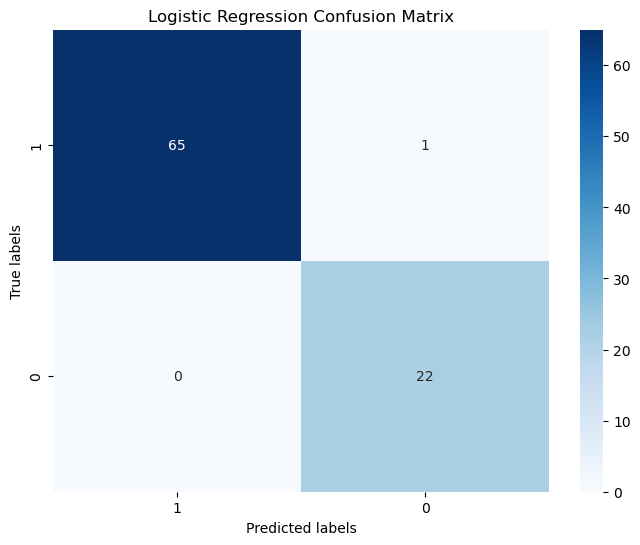

In [109]:
lr_cm = confusion_matrix(y_test,lr_pred)
plot_confusion_matrix(lr_cm,df['diagnosis'].unique(),title = "Logistic Regression Confusion Matrix")


In [112]:
for i, col in zip(range(X.shape[1]), X.columns):
    if rfe.ranking_[i] ==1:
        print(f"{col}")
    #print(f"{col} select = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

compactness_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
area_se
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
